# Does modulus of sum of a uniform distribution also produce a uniform distribution?

I have been working on an [Ethereum lottery](https://github.com/strange-labs-uk/ethereum-lottery) Dapp with folks attending a [meetup](https://www.meetup.com/Hacking-on-Ethereums-Solidity/) hosted by Strange Labs (Gloucester Road, Bristol) and we faced a problem where we realised that Solidity does not have a built in random number generator and therefore picking a winner turned out to be more difficult that anyone imagined.

In order to make the system truly trustless, one of the ideas involved each participant generating their own random number and submitting it to the contract when they buy their lottery tickets. However I was concerned that taking a sum of of these numbers would result in a normal distribution allowing the early and late participants to have a built in disadvantage.

To solve this, taking a modulus of the sum seemed like a way around the problem however I wanted to make sure that this was really the case. Therefore, [this notebook](https://github.com/brtknr/UniformModulus) is an exploration of whether the list of modulus really does produce a uniform distribution over lots of simulated scenarios.

# Import relevant modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss

# Helper functions

In [2]:
def test(num_of_vars_in_dist, random_num_max_val, num_of_random_nums, num_of_iterations):
    list_of_sums = list()
    list_of_indices = list()

    for i in range(num_of_iterations):
        list_of_randoms = np.random.randint(
            random_num_max_val,
            size=num_of_random_nums
        )
        
        sum_of_randoms = list_of_randoms.sum()
        list_of_sums.append(sum_of_randoms)
        index = sum_of_randoms % num_of_vars_in_dist
        list_of_indices.append(index)

    return dict(
        list_of_sums=list_of_sums,
        list_of_indices=list_of_indices,
    )

def hist(result, key, bins=100):
    plt.ion()
    plt.figure()
    plt.hist(result[key], bins=bins)
    plt.xlabel(key)
    plt.ylabel('density')

# Run the test

In [3]:
result = test(
    num_of_vars_in_dist=100,
    random_num_max_val=1000,
    num_of_random_nums=100,
    num_of_iterations=10**5
    )

# Inspect the distribution of `list_of_sums`

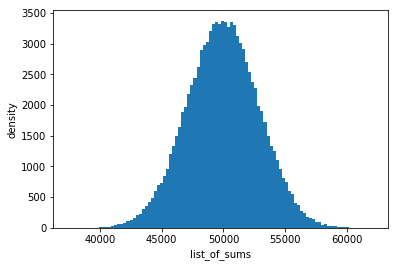

In [4]:
hist(result,'list_of_sums')

In [5]:
ss.kstest(result['list_of_sums'], 'norm', args=(), alternative='two-sided', mode='approx')

KstestResult(statistic=1.0, pvalue=0.0)

It looks like the sum of random produce a two-sided distribution, the kind of behaviour we expect when we take a sum of all the numbers produced when we roll multiple dice where the mean of number of faces has the highest likelihood of manifesting.

# Now lets look at the values of `var_dist`

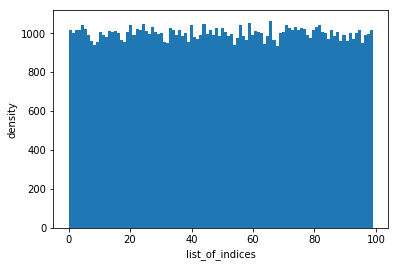

In [6]:
hist(result,'list_of_indices')

In [7]:
ss.kstest(result['list_of_indices'], 'uniform', args=(), alternative='two-sided', mode='approx')

KstestResult(statistic=0.98985000000000001, pvalue=0.0)

It looks like the list of indices are more or less uniformly distributed and the statistical test confirms our visual observation. Therefore, we can conclude that numbers generated by taking a modulus of sum of randomly generated numbers is a reliable pseudo-random number generator.

In [8]:
!jupyter nbconvert --to markdown Notebook.ipynb

[NbConvertApp] Converting notebook Notebook.ipynb to markdown
[NbConvertApp] Support files will be in Notebook_files/
[NbConvertApp] Making directory Notebook_files
[NbConvertApp] Making directory Notebook_files
[NbConvertApp] Writing 3738 bytes to Notebook.md
